<a href="https://colab.research.google.com/github/Rafaelmos/svm-makert-bancario/blob/main/svm_makert_bancario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre a base de dados

Esta base de dados está relacionada com campanhas de marketing direto (ligações telefônicas) de uma instituição bancária portuguesa. O objetivo da classificação é prever se o cliente se inscreverá em um depósito a prazo (variável y).

Link para base de dados: https://archive.ics.uci.edu/dataset/222/bank+marketing



Moro, S., Rita, P. e Cortez, P. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

Na base existe 4 conjuntos de dados:


*  bank-additional-full.csv com todos os exemplos (41188) e 20 entradas, ordenados por data (de maio de 2008 a novembro de 2010), muito próximos dos dados analisados por [Moro et al., 2014].
*   bank-additional.csv com 10% dos exemplos (4119), selecionados aleatoriamente a partir de 1), e 20 entradas.
*   bank-full.csv com todos os exemplos e 17 entradas, ordenados por data (versão anterior deste conjunto de dados com menos entradas).
*   bank.csv com 10% dos exemplos e 17 entradas, selecionados aleatoriamente de 3 (versão anterior deste conjunto de dados com menos entradas).

Escolhemos o conjunto de dados **"bank.csv"** para usarmos o algoritmo de aprendizado de máquina **Support Vector Machine (SVM)**





## Dados encontrados na base



**DADOS DO CLIENTE**

1.   **age: idade** (numérico)
2.   **job: tipo de emprego** (categórico: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3.   **marital: estado civil** (categórico: "married","divorced","single"; nota: "divorced" significa divorciado ou viúvo)
4.   **education: nível de escolaridade** (categórico: "unknown","secondary","primary","tertiary")
5.   **default: tem crédito em atraso?** (binário: "yes","no")
6.   **balance: saldo médio anual, em euros** (numérico)
7.   **housing: possui empréstimo habitacional?** (binário: "yes","no")
8.   **loan: possui empréstimo pessoal?** (binário: "yes","no")

**RELACIONADOS AO ÚLTIMO CONTATO DA CAMAPANHA ATUAL**

9.   **contact: tipo de comunicação de contato** (categórico: "unknown","telephone","cellular")
10.   **day: último dia de contato do mês** (numérico)
11.   **month: último mês de contato do ano** (categórico: "jan", "feb", "mar", ..., "nov", "dec")
12.   **duration: duração do último contato, em segundos** (numérico)

**OUTROS ATRIBUTOS**

13. **campaign: número de contatos realizados durante esta campanha e para este cliente** (numérico, inclui o último contato)
14. **pdays: número de dias que passaram após o último contato do cliente em uma campanha anterior**
(numérico, -1 significa que o cliente não foi contatado anteriormente)
15. **previous: número de contatos realizados antes desta campanha e para este cliente** (numérico)
16. **poutcome: resultado da campanha de marketing anterior** (categórico: "unknown","other","failure","success")
Variável de Saída (alvo desejado):
17. **y: o cliente se inscreveu em um depósito a prazo?** (binário: "yes","no")


# Upload da Base de Dados

In [ ]:
from google.colab import files
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder

from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Ler o CSV do link no github
# O parâmetro quoting==0 remove as aspas presentes no CSV
url = 'https://raw.githubusercontent.com/mochaeng/Intelligent-Systems/main/projects/svm/bank.csv'
df = pd.read_csv(url,  delimiter=';', quoting=0)

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Resumo Estatístico Inicial:

In [ ]:
# Use a função 'describe()' para obter um resumo estatístico
resumo_estatistico = df.describe()

# Exiba o resumo estatístico
print(resumo_estatistico)

               age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Distribuições das Variáveis Numéricas:

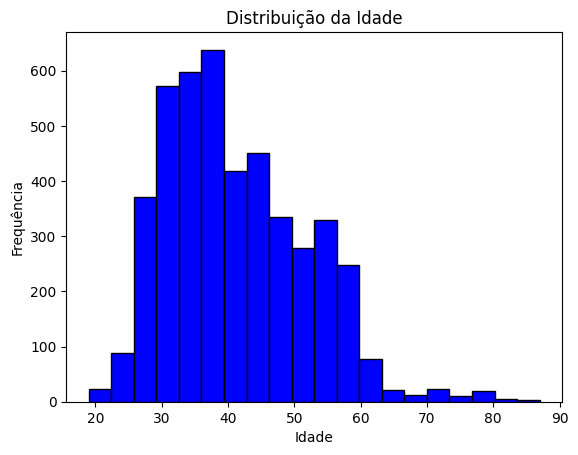

In [ ]:
# Histograma para a variável "age"
plt.hist(df['age'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


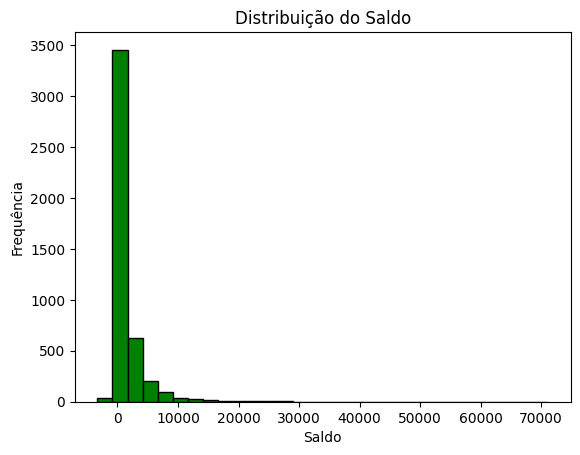

In [ ]:
# Histograma para a variável "balance"
plt.hist(df['balance'], bins=30, color='green', edgecolor='black')
plt.title('Distribuição do Saldo')
plt.xlabel('Saldo')
plt.ylabel('Frequência')
plt.show()

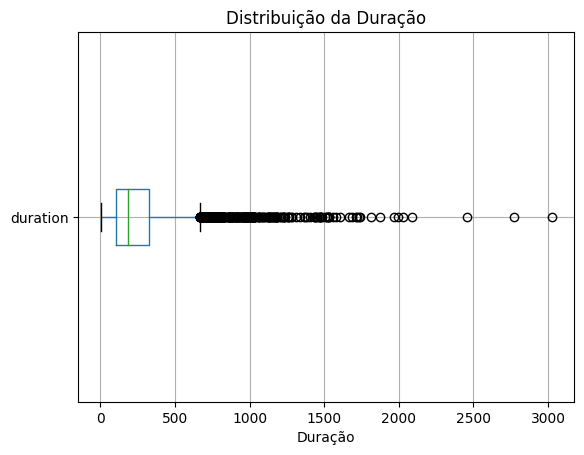

In [ ]:
# Gráfico de caixa para a variável "duration"
df.boxplot(column='duration', vert=False)
plt.title('Distribuição da Duração')
plt.xlabel('Duração')
plt.show()

## Distribuições das Variáveis Categóricas:


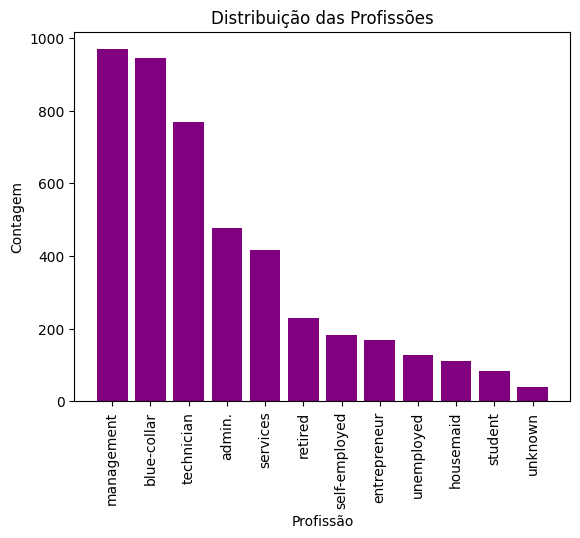

In [ ]:
# Gráfico de barras para a variável "job"
job_counts = df['job'].value_counts()
plt.bar(job_counts.index, job_counts.values, color='purple')
plt.title('Distribuição das Profissões')
plt.xlabel('Profissão')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

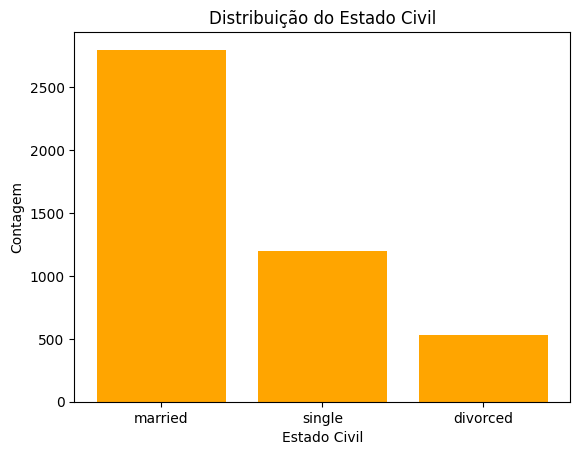

In [ ]:
# Gráfico de barras para a variável "marital"
marital_counts = df['marital'].value_counts()
plt.bar(marital_counts.index, marital_counts.values, color='orange')
plt.title('Distribuição do Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.show()

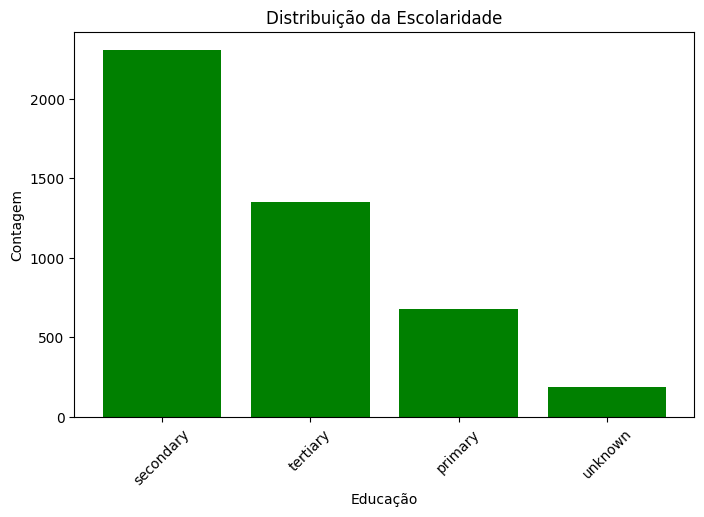

In [ ]:
# Gráfico de barras para a variável "education"
education_counts = df['education'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(education_counts.index, education_counts.values, color='green')
plt.title('Distribuição da Escolaridade')
plt.xlabel('Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


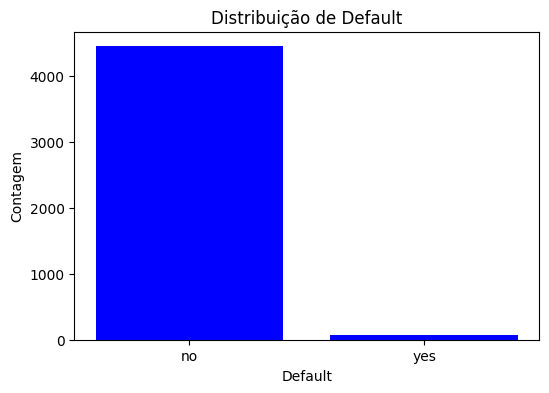

In [ ]:
# Gráfico de barras para a variável "default"
default_counts = df['default'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(default_counts.index, default_counts.values, color='blue')
plt.title('Distribuição de Default')
plt.xlabel('Default')
plt.ylabel('Contagem')
plt.show()


## Exploração de Valores Ausentes:





## Visualização de Relações:

## Análise da Variável de Destino:


## Correlação entre Variáveis Numéricas:

Neste exemplo, selecionamos as variáveis numéricas "age", "balance", "duration", "campaign", "pdays", "previous" para calcular a matriz de correlação. O mapa de calor mostra os valores de correlação entre essas variáveis. Valores próximos a 1 indicam correlação positiva, valores próximos a -1 indicam correlação negativa, e valores próximos a 0 indicam correlação fraca ou nula.

Interprete o mapa de calor para entender como as variáveis numéricas estão relacionadas entre si. Isso pode ajudar a identificar quais variáveis têm uma relação mais forte e podem ser importantes em análises ou modelagem futuras.

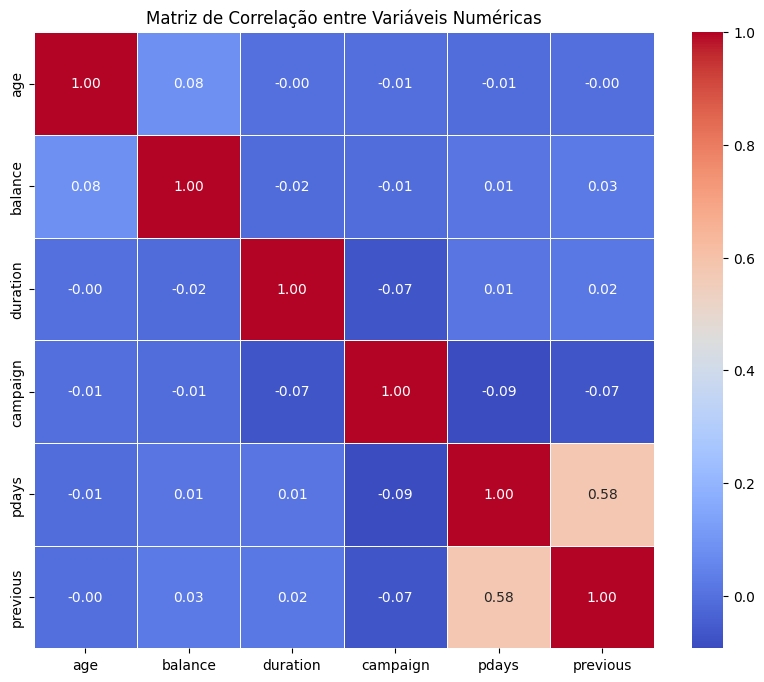

In [ ]:
# Calcula a matriz de correlação para as variáveis numéricas
correlation_matrix = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].corr()

# Cria um mapa de calor (heatmap) da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


In [ ]:
# Verificar valores ausentes em todo o conjunto de dados
missing_values = df.isnull().sum()

# Exibir os valores ausentes por coluna
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Exemplo de remoção de linhas com valores ausentes
#df_cleaned = df.dropna()

Neste exemplo, estamos plotando um gráfico de dispersão entre as variáveis "age" e "balance" e usando a cor para representar a variável de destino "y" (subscrição de depósito a prazo). Isso permite visualizar como a idade e o saldo estão relacionados à subscrição.

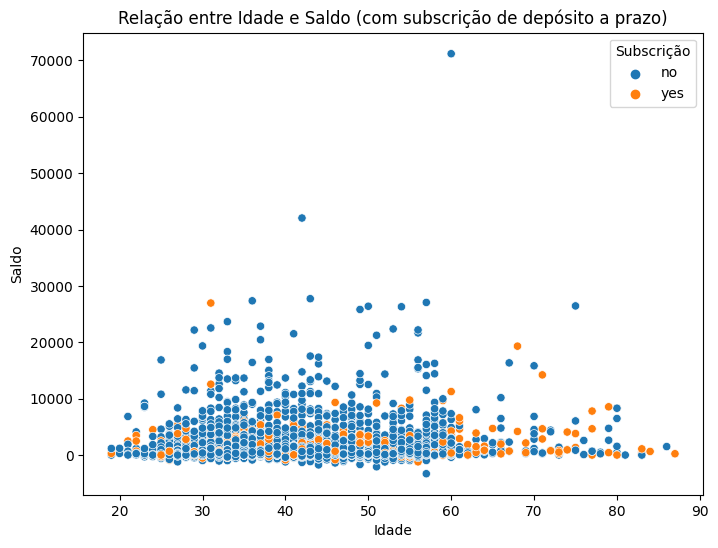

In [ ]:
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['age'], y=df['balance'], hue=df['y'], palette=colors)
plt.title('Relação entre Idade e Saldo (com subscrição de depósito a prazo)')
plt.xlabel('Idade')
plt.ylabel('Saldo')

plt.legend(title='Subscrição')

plt.show()


Neste exemplo, estamos usando um gráfico de barras empilhadas para visualizar a relação entre a variável categórica "job" (profissão) e a variável de destino "y" (subscrição de depósito a prazo). Isso permite ver como diferentes profissões estão relacionadas à subscrição.

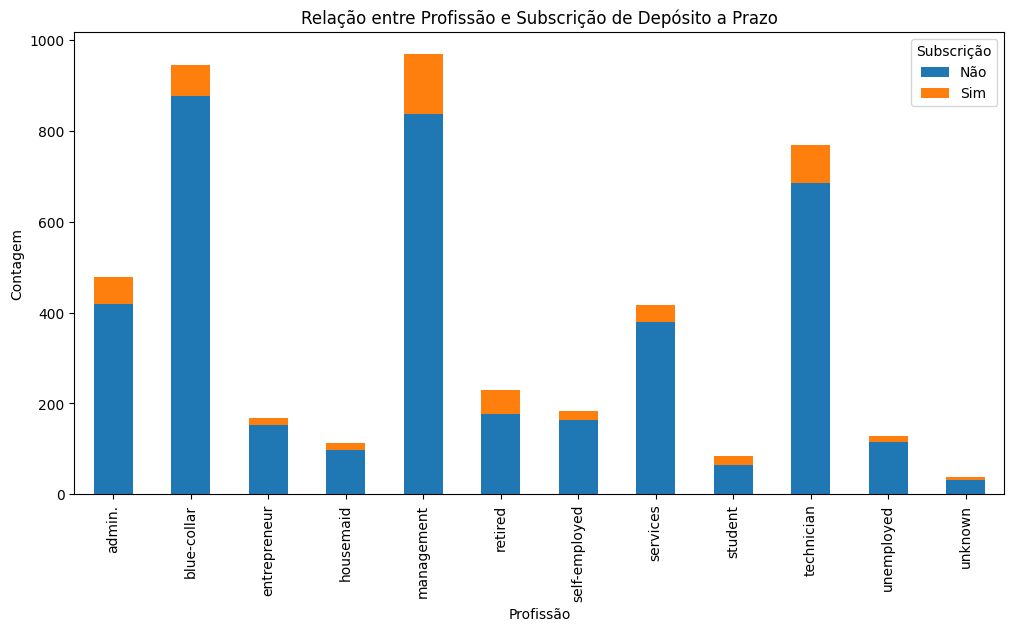

In [ ]:
# Exemplo: Gráfico de barras empilhadas para a relação entre "job" e "y"
job_y_counts = df.groupby(['job', 'y']).size().unstack()
job_y_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relação entre Profissão e Subscrição de Depósito a Prazo')
plt.xlabel('Profissão')
plt.ylabel('Contagem')
plt.legend(title='Subscrição', labels=['Não', 'Sim'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Calcule a distribuição das classes na variável de destino "y"
y_distribution = df['y'].value_counts()

# Exiba a distribuição das classes
print("Distribuição da Variável de Destino (Subscrição de Depósitos a Prazo):")
print(y_distribution)


Distribuição da Variável de Destino (Subscrição de Depósitos a Prazo):
no     4000
yes     521
Name: y, dtype: int64


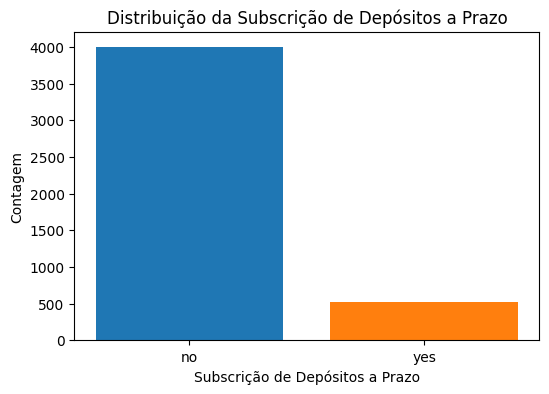

In [ ]:
# Gráfico de barras para visualizar a distribuição da variável de destino
plt.figure(figsize=(6, 4))
plt.bar(y_distribution.index, y_distribution.values, color=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição da Subscrição de Depósitos a Prazo')
plt.xlabel('Subscrição de Depósitos a Prazo')
plt.ylabel('Contagem')
plt.show()


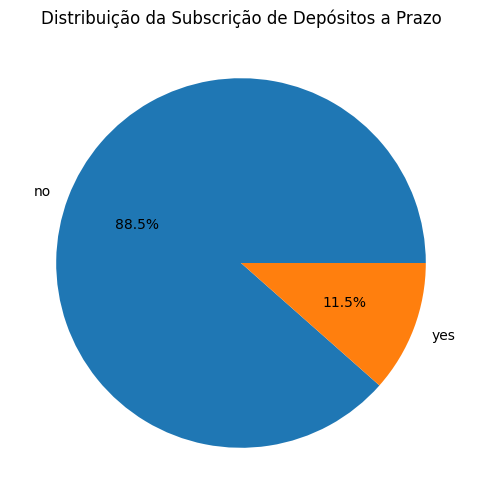

In [ ]:
# Gráfico de pizza para visualizar a distribuição da variável de destino
plt.figure(figsize=(6, 6))
plt.pie(y_distribution, labels=y_distribution.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title('Distribuição da Subscrição de Depósitos a Prazo')
plt.show()


## Análise de Disparidades e Relações Importantes:

In [ ]:
"""correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['"y"'].sort_values(ascending=False)
print(correlation_with_target)"""

'correlation_matrix = df.corr()\ncorrelation_with_target = correlation_matrix[\'"y"\'].sort_values(ascending=False)\nprint(correlation_with_target)'

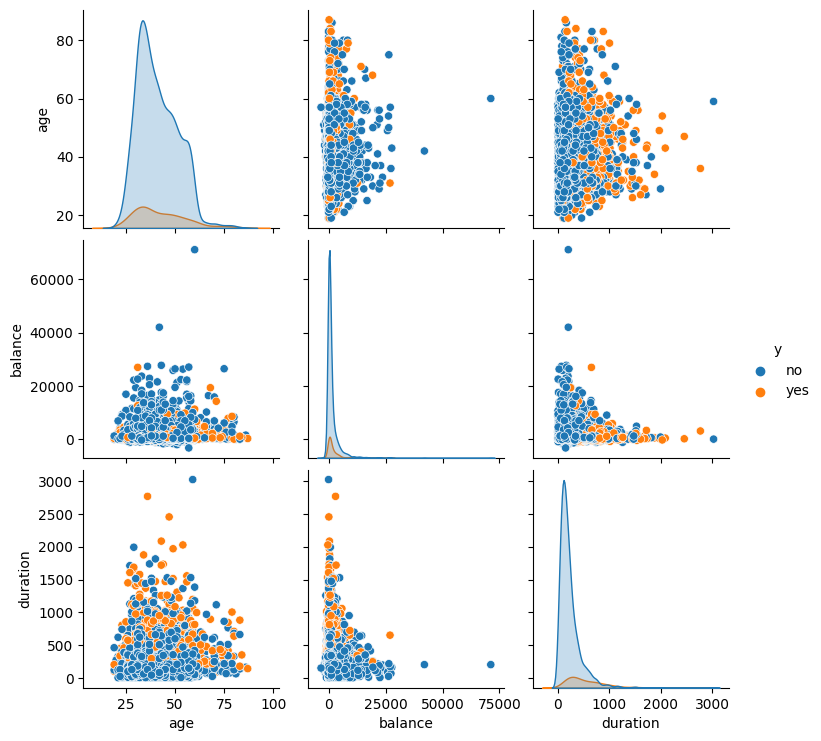

In [ ]:
sns.pairplot(df, vars=['age', 'balance', 'duration'], hue='y')
plt.show()

In [ ]:
subscribed = df[df['y'] == 'yes']
not_subscribed = df[df['y'] == 'no']

# Exemplo de teste t para idade
t_stat, p_value = stats.ttest_ind(subscribed['age'], not_subscribed['age'])
print(f'T-Statistic: {t_stat}, p-value: {p_value}')


T-Statistic: 3.034315524024384, p-value: 0.002424535817380578


In [ ]:
"""# Gráfico de barras empilhadas para o estado civil (marital) em relação à subscrição
marital_subscribed = df[df['"y"'] == 'yes']['"marital"'].value_counts()
marital_not_subscribed = df[df['"y"'] == 'no']['"marital"'].value_counts()

marital_df = pd.DataFrame({'Subscribed': marital_subscribed, 'Not Subscribed': marital_not_subscribed})
marital_df.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs. Subscription')
plt.show()"""


'# Gráfico de barras empilhadas para o estado civil (marital) em relação à subscrição\nmarital_subscribed = df[df[\'"y"\'] == \'yes\'][\'"marital"\'].value_counts()\nmarital_not_subscribed = df[df[\'"y"\'] == \'no\'][\'"marital"\'].value_counts()\n\nmarital_df = pd.DataFrame({\'Subscribed\': marital_subscribed, \'Not Subscribed\': marital_not_subscribed})\nmarital_df.plot(kind=\'bar\', stacked=True)\nplt.xlabel(\'Marital Status\')\nplt.ylabel(\'Count\')\nplt.title(\'Marital Status vs. Subscription\')\nplt.show()'

<Figure size 1000x600 with 0 Axes>

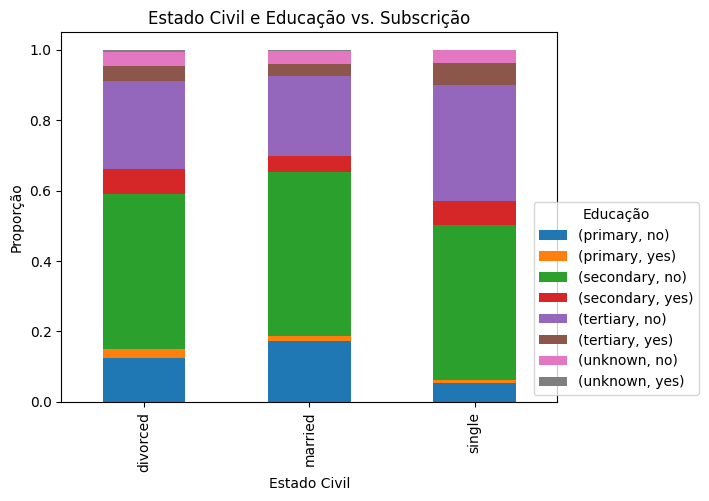

In [ ]:
ct = pd.crosstab(index=df['marital'], columns=[df['education'], df['y']], normalize='index')
plt.figure(figsize=(10, 6))  # Aumente o tamanho da figura

ax = ct.plot(kind='bar', stacked=True)

plt.xlabel('Estado Civil')
plt.ylabel('Proporção')
plt.title('Estado Civil e Educação vs. Subscrição')

# Coloque a legenda no canto inferior esquerdo
plt.legend(title='Educação', loc='lower right', bbox_to_anchor=(1.3, 0))

plt.show()


## Normalização categórica da base

Os dois métodos de normalização categórica foram utilizados

- Ordinal Encoding: **education** e **month**. Pois, podemos estabelecer uma ordem hierárquica entre os valores.

- Label Encoding: **job**, **default**, **housing**, **loan**, **contact**, **poutcome**, **y**. Já que os valores são coisas como _masculino_, _feminino_ e _yes_, _no_, label encoding é o que melhor se encaixa.



In [ ]:
bank_df = df.copy()

## Ordinal (Ordinal Encoding)
ordinal_columns = ['marital','education', 'month']
edu_options = ['unknown','primary' ,'secondary' ,'tertiary']
moth_options = ['zero','jan', 'feb', 'mar', 'apr','may','jun','jul','aug','sep','oct','nov', 'dec']
marital_options = ['single','married','divorced']
ordinal_encode = OrdinalEncoder(categories=[marital_options, edu_options, moth_options])
bank_df[ordinal_columns] = ordinal_encode.fit_transform(df[ordinal_columns])


## Label (Label Encoding)
label_columns = ['job', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']
label_encode = OrdinalEncoder()
bank_df[label_columns] = label_encode.fit_transform(bank_df[label_columns])

bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1.0,1.0,0.0,1787,0.0,0.0,0.0,19,10.0,79,1,-1,0,3.0,0.0
1,33,7.0,1.0,2.0,0.0,4789,1.0,1.0,0.0,11,5.0,220,1,339,4,0.0,0.0
2,35,4.0,0.0,3.0,0.0,1350,1.0,0.0,0.0,16,4.0,185,1,330,1,0.0,0.0
3,30,4.0,1.0,3.0,0.0,1476,1.0,1.0,2.0,3,6.0,199,4,-1,0,3.0,0.0
4,59,1.0,1.0,2.0,0.0,0,1.0,0.0,2.0,5,5.0,226,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7.0,1.0,2.0,0.0,-333,1.0,0.0,0.0,30,7.0,329,5,-1,0,3.0,0.0
4517,57,6.0,1.0,3.0,1.0,-3313,1.0,1.0,2.0,9,5.0,153,1,-1,0,3.0,0.0
4518,57,9.0,1.0,2.0,0.0,295,0.0,0.0,0.0,19,8.0,151,11,-1,0,3.0,0.0
4519,28,1.0,1.0,2.0,0.0,1137,0.0,0.0,0.0,6,2.0,129,4,211,3,1.0,0.0



## Correlação entre Variáveis:

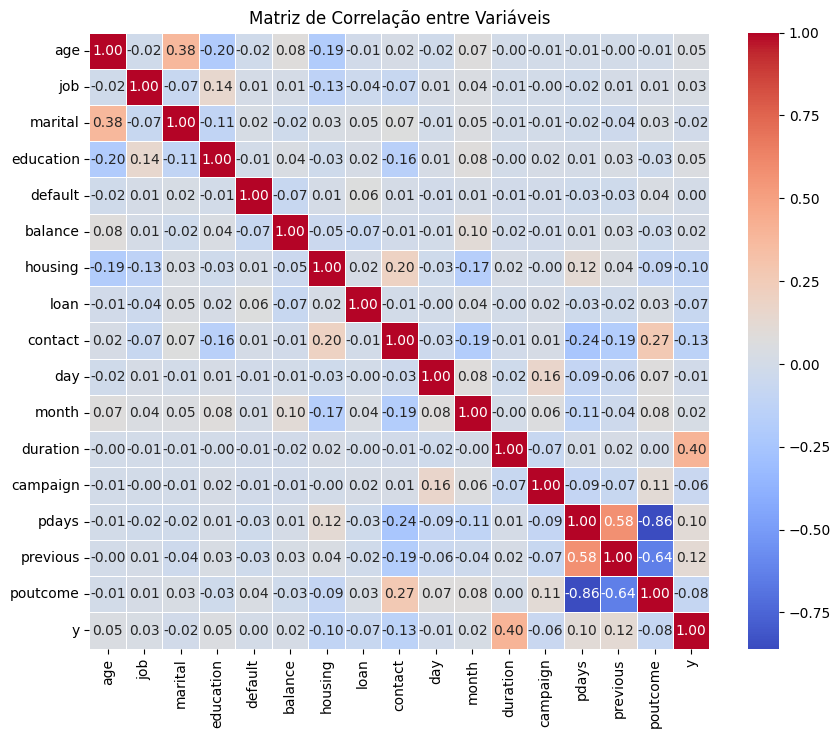

In [ ]:
# Calcula a matriz de correlação para as variáveis
correlation_matrix = bank_df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan','contact','day','month','duration','campaign','pdays','previous','poutcome','y']].corr()
#age	job	marital	education	default	balance	housing	loan	contact	day	month	duration	campaign	pdays	previous	poutcome	y
# Cria um mapa de calor (heatmap) da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

## Remoção de Colunas

In [ ]:
# ABORDAGEM 1
#X = bank_df.drop(columns=['y'], axis=1)

# ABORDAGEM 2
# Apenas variáveis numéricas
#X = bank_df.drop(columns=['y','job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'previous', 'poutcome'], axis=1)

# ABORDAGEM 3
# Apenas variáveis Catégoricas
#X = bank_df.drop(columns=['y', 'age', 'balance', 'day', 'month', 'duration', 'pdays'], axis=1)

# ABORDAGEM 4
# Remoção dos variáveis Correlacionadas (Correlação acima de 0.5)
#'pdays', 'previous', 'poutcome'
X = bank_df.drop(columns=['y', 'pdays', 'previous', 'poutcome'], axis=1)

y = bank_df['y']

## Min-Max e Z-Score

In [ ]:
X_min_max = MinMaxScaler().fit_transform(X)
X_not_norm = X.to_numpy()
X_zscore = zscore(X).to_numpy()

## Treinamento do Modelo

Será testado o SVM com os seguintes kernels: "..."

In [ ]:
def split_and_train(x_arrays, kernel_name='rbf'):
    algorithms = ['não-normalizado', 'min-max', 'z-score']
    results = []
    for idx, x_array in enumerate(x_arrays):
        X_train, X_test, y_train, y_test = train_test_split(x_array, y, test_size=0.3, random_state=57)

        svc = SVC(kernel=kernel_name)
        svc.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, svc.predict(X_test))

        results.append([algorithms[idx], accuracy])

    accuracy_df = pd.DataFrame(results, columns=['normalização', 'Accuracy'])

    return accuracy_df

In [ ]:
split_and_train([X_not_norm, X_min_max, X_zscore], 'rbf')

,normalização,Accuracy
0,não-normalizado,0.891673
1,min-max,0.891673
2,z-score,0.898305


In [ ]:
split_and_train([X_not_norm, X_min_max, X_zscore], 'poly')

,normalização,Accuracy
0,não-normalizado,0.891673
1,min-max,0.889462
2,z-score,0.897568


In [ ]:
split_and_train([X_not_norm, X_min_max, X_zscore], 'sigmoid')

,normalização,Accuracy
0,não-normalizado,0.875461
1,min-max,0.813559
2,z-score,0.865144


# Análise dos resultados

## Abordagens 1 ao 4

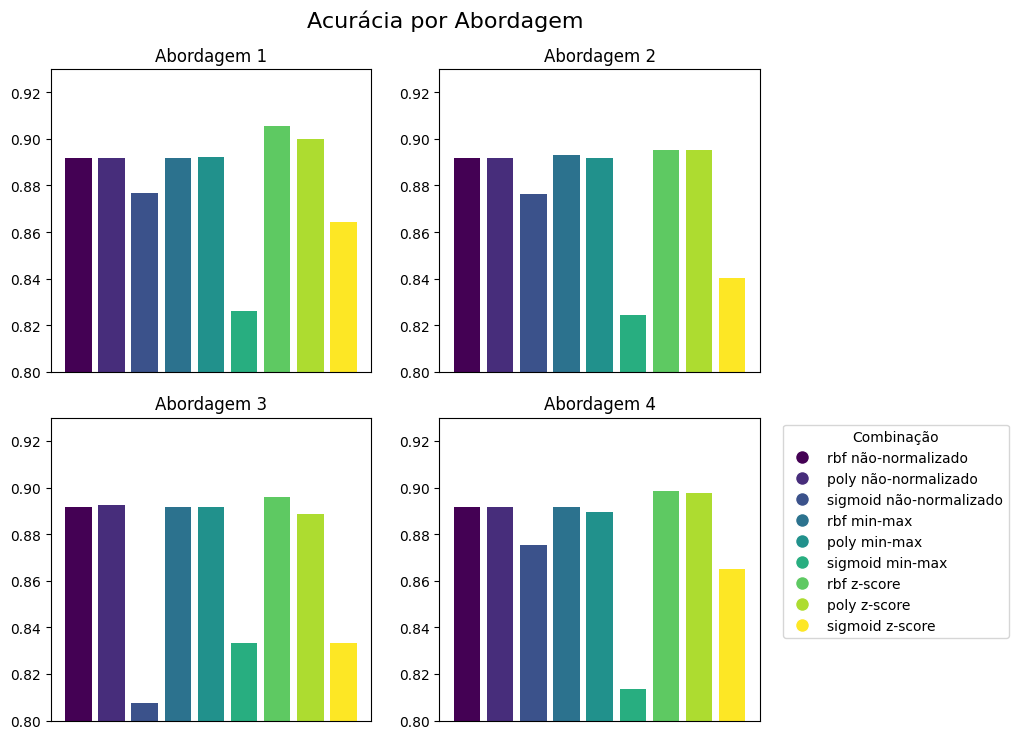

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados
abordagens = [1, 2, 3, 4]
kernel_types = ['rbf', 'poly', 'sigmoid']
normalization_types = ['não-normalizado', 'min-max', 'z-score']

acuracias = {
    1: {
        'rbf não-normalizado': 0.891673,
        'rbf min-max': 0.891673,
        'rbf z-score': 0.905674,
        'poly não-normalizado': 0.891673,
        'poly min-max': 0.892410,
        'poly z-score': 0.899779,
        'sigmoid não-normalizado': 0.876934,
        'sigmoid min-max': 0.826087,
        'sigmoid z-score': 0.864407
    },
    2: {
        'rbf não-normalizado': 0.891673,
        'rbf min-max': 0.893147,
        'rbf z-score': 0.895357,
        'poly não-normalizado': 0.891673,
        'poly min-max': 0.891673,
        'poly z-score': 0.895357,
        'sigmoid não-normalizado': 0.876197,
        'sigmoid min-max': 0.824613,
        'sigmoid z-score': 0.840088
    },
    3: {
        'rbf não-normalizado': 0.891673,
        'rbf min-max': 0.891673,
        'rbf z-score': 0.896094,
        'poly não-normalizado': 0.892410,
        'poly min-max': 0.891673,
        'poly z-score': 0.888725,
        'sigmoid não-normalizado': 0.807664,
        'sigmoid min-max': 0.833456,
        'sigmoid z-score': 0.833456
    },
    4: {
        'rbf não-normalizado': 0.891673,
        'rbf min-max': 0.891673,
        'rbf z-score': 0.898305,
        'poly não-normalizado': 0.891673,
        'poly min-max': 0.889462,
        'poly z-score': 0.897568,
        'sigmoid não-normalizado': 0.875461,
        'sigmoid min-max': 0.813559,
        'sigmoid z-score': 0.865144
    }
}


cores = plt.cm.viridis(np.linspace(0, 1, len(kernel_types) * len(normalization_types)))


fig, axs = plt.subplots(2, 2, figsize=(9, 7.5))
fig.suptitle('Acurácia por Abordagem', fontsize=16)

for i, abordagem in enumerate(abordagens):
    ax = axs[i // 2, i % 2]
    ax.set_title(f'Abordagem {abordagem}')


    acuracias_abordagem = {}
    for norm in normalization_types:
        for kernel in kernel_types:
            chave = f'{kernel} {norm}'
            acuracias_abordagem[chave] = acuracias[abordagem][chave]


    x = range(len(acuracias_abordagem))
    y = list(acuracias_abordagem.values())
    ax.bar(x, y, color=cores)
    ax.set_xticks([])
    ax.set_ylim(0.8, 0.93)

# Legenda para cores
handles = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                      markersize=10, markerfacecolor=cor) for key, cor in zip(acuracias_abordagem.keys(), cores)]
plt.legend(handles=handles, title='Combinação', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)
plt.show()


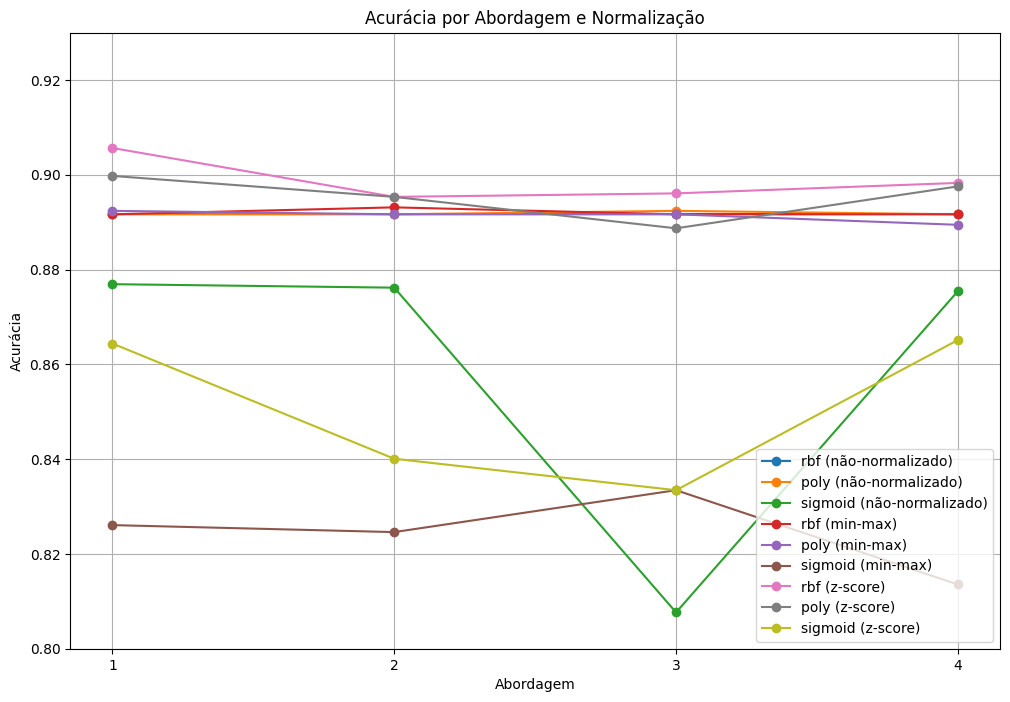

In [ ]:

abordagens = [1, 2, 3, 4]
kernel_types = ['rbf', 'poly', 'sigmoid']
normalization_types = ['não-normalizado', 'min-max', 'z-score']

acuracias = {
    'rbf não-normalizado': [0.891673, 0.891673, 0.891673, 0.891673],
    'rbf min-max': [0.891673, 0.893147, 0.891673, 0.891673],
    'rbf z-score': [0.905674, 0.895357, 0.896094, 0.898305],
    'poly não-normalizado': [0.891673, 0.891673, 0.892410, 0.891673],
    'poly min-max': [0.892410, 0.891673, 0.891673, 0.889462],
    'poly z-score': [0.899779, 0.895357, 0.888725, 0.897568],
    'sigmoid não-normalizado': [0.876934, 0.876197, 0.807664, 0.875461],
    'sigmoid min-max': [0.826087, 0.824613, 0.833456, 0.813559],
    'sigmoid z-score': [0.864407, 0.840088, 0.833456, 0.865144]
}


fig, ax = plt.subplots(figsize=(12, 8))

for norm_type in normalization_types:
    for kernel_type in kernel_types:
        label = f'{kernel_type} ({norm_type})'
        acuracia = [acuracias[f'{kernel_type} {norm_type}'][i] for i in range(len(abordagens))]
        ax.plot(abordagens, acuracia, marker='o', label=label)

ax.set_ylim(0.8, 0.93)

ax.set_xlabel('Abordagem')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia por Abordagem e Normalização')
ax.set_xticks(abordagens)
ax.legend(loc='lower right')

plt.grid(True)
plt.show()